<a href="https://colab.research.google.com/github/mygoal-javadeveloper/Dphi_Machine-Learning_Datathon_and_Assignments/blob/master/mygoal-javadeveloper/Dphi_Machine-Learning_Datathon_and_Assignments/tree/master/Data_Sprint_8_Audit_Data/AuditDataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Context
This Notebook is related to Audit dataset where the goal is to help the auditors by building a classification model that can predict the fraudulent firm on the basis of present and historical risk factors.

# A brief overview what audit means and about the dataset

The term **audit** usually refers to financial audit, which is an objective examination and evaluation of the financial statements of an organization to make sure that the financial records are a fair and accurate representation of the transactions they claim to represent.

#### Dataset Description

Many risk factors are examined from various areas like past records of audit office, audit-paras, environmental conditions reports, firm reputation summary, on-going issues report, profit-value records, loss-value records, follow-up reports etc.

Some of the columns/features are:

|Column Name|Description|
|:----|:----|
|Sector_score|sector score of the firm|
|LOCATION_ID|location id of the firm|
|score_X|different types of score values|
|risk_X|different types of risk levels|
|Inherent_Risk|the risk posed by an error or omission in a financial statement due to a factor other than a failure of internal control|
|CONTROL_RISK|Control Risk is the risk of a material misstatement in the financial statements arising due to absence or failure in the operation of relevant controls of the entity|
|Detection_Risk|Detection Risk is the risk that the auditors fail to detect a material misstatement in the financial statements|
|Audit_Risk|Audit risk (AR) refers to the risk that an auditor may issue an unqualified report due to the auditor's failure to detect material misstatement either due to error or fraud. This risk is composed of Inherent risk (IR), Control risk (CR), and Detection risk (DR) Audit risk can be calculated as: AR = IR × CR × DR|
|Money_Value|Value for money of an audit|
|Risk|Whether the firm is fraudulent or not, it is the target value|







# Importing all the necessary libraries and modules 

In [ ]:
#importing libraries 
import numpy as np
import pandas as pd

#importing libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#libraries for data preprocessing and for machine learning model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, precision_recall_curve,roc_auc_score

# Reading the Datasets - Train Dataset and new unseen Test Dataset

In [ ]:
#reading training dataset
audit_data  = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/training_set_label.csv')

In [ ]:
#reading newtest dataset
audit_testdata = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/audit_data/testing_set_label.csv')

# Analyzing and Understanding the Datasets - Train Dataset and new unseen Test Dataset

In [ ]:
#finding the total rows and columns of dataset
audit_data.shape

(543, 27)

In [ ]:
#finding the total rows and columns of new test dataset
audit_testdata.shape

(233, 26)

In [ ]:
#getting the overview of all the columns in the dataset
audit_data.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [ ]:
#getting the overview of all the columns in the new test dataset
audit_testdata.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk'],
      dtype='object')

In [ ]:
#first 5 rows content of the dataset
audit_data.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,2.72,8,1.13,0.4,0.452,0.00,0.2,0.000,1.13,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,1.852,0.4,0.5,0.3704,0
1,1.85,13,8.25,0.6,4.950,1.59,0.4,0.636,9.84,5.0,0.2,1.0,0.02,0.2,0.004,2,0.2,0.4,0,0.2,0.0,3.0,6.990,0.4,0.5,1.3980,1
2,2.72,19,2.13,0.6,1.278,0.59,0.2,0.118,2.72,5.0,0.2,1.0,0.76,0.2,0.152,2,0.2,0.4,0,0.2,0.0,2.4,2.948,0.4,0.5,0.5896,0
3,59.85,21,0.42,0.2,0.084,0.00,0.2,0.000,0.42,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.884,0.8,0.5,0.7536,0
4,2.72,4,1.33,0.4,0.532,0.35,0.2,0.070,1.68,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.2,2.002,0.4,0.5,0.4004,0


In [ ]:
#first 5 rows content of the new test dataset
audit_testdata.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,3.89,22,0.00,0.2,0.000,18.05,0.6,10.830,18.05,5.0,0.2,1.0,2.29,0.2,0.458,2,0.2,0.4,0,0.2,0.0,3.2,12.688,0.4,0.5,2.5376
1,55.57,29,1.26,0.4,0.504,1.58,0.4,0.632,2.84,5.0,0.2,1.0,6.50,0.4,2.600,2,0.2,0.4,0,0.2,0.0,3.0,5.136,0.4,0.5,1.0272
2,2.72,16,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,4,0.2,0.8,0,0.2,0.0,2.2,1.800,0.8,0.5,0.7200
3,59.85,4,0.00,0.2,0.000,0.00,0.2,0.000,0.00,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.400,0.4,0.5,0.2800
4,3.41,16,11.73,0.6,7.038,85.87,0.6,51.522,97.60,5.0,0.2,1.0,6.96,0.4,2.784,2,0.2,0.4,1,0.4,0.4,4.0,63.144,0.8,0.5,25.2576


In [ ]:
#getting brief overview of the dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has and memory usage.
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 543 entries, 0 to 542
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    543 non-null    float64
 1   LOCATION_ID     543 non-null    object 
 2   PARA_A          543 non-null    float64
 3   Score_A         543 non-null    float64
 4   Risk_A          543 non-null    float64
 5   PARA_B          543 non-null    float64
 6   Score_B         543 non-null    float64
 7   Risk_B          543 non-null    float64
 8   TOTAL           543 non-null    float64
 9   numbers         543 non-null    float64
 10  Score_B.1       543 non-null    float64
 11  Risk_C          543 non-null    float64
 12  Money_Value     543 non-null    float64
 13  Score_MV        543 non-null    float64
 14  Risk_D          543 non-null    float64
 15  District_Loss   543 non-null    int64  
 16  PROB            543 non-null    float64
 17  RiSk_E          543 non-null    flo

In [ ]:
#getting brief overview of the new test dataset - number of columns and rows (shape of dataset), columns names and its dtype, how many non-null values it has 
#and memory usage.
audit_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    233 non-null    float64
 1   LOCATION_ID     233 non-null    object 
 2   PARA_A          233 non-null    float64
 3   Score_A         233 non-null    float64
 4   Risk_A          233 non-null    float64
 5   PARA_B          233 non-null    float64
 6   Score_B         233 non-null    float64
 7   Risk_B          233 non-null    float64
 8   TOTAL           233 non-null    float64
 9   numbers         233 non-null    float64
 10  Score_B.1       233 non-null    float64
 11  Risk_C          233 non-null    float64
 12  Money_Value     232 non-null    float64
 13  Score_MV        233 non-null    float64
 14  Risk_D          233 non-null    float64
 15  District_Loss   233 non-null    int64  
 16  PROB            233 non-null    float64
 17  RiSk_E          233 non-null    flo

In [ ]:
#just extra checking for null values
audit_data.isnull().sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [ ]:
#checking for duplicates values
audit_data.duplicated().sum()

6

In [ ]:
#rough checking how many times may each of the 6 values (output above) exists in the dataset
audit_data.duplicated(keep=False).sum()

11

# Pre-processing of the data in Train Dataset and new unseen Test Dataset

In [ ]:
#sorting the dataset to delete the duplicates, to make duplicates come together one after another. The sorted dataset index values are also changed
cols = list(audit_data.columns)
audit_data.sort_values(by=cols, inplace=True, ignore_index=True)

In [ ]:
#dropping the duplicates only keeping the last value (ordinally last row from sorted) of each duplicates
audit_data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

In [ ]:
#re-checking everything worked well with drop_duplicates() carried out earlier on the dataset
audit_data.duplicated().sum()

0

In [ ]:
#getting list of all object datatypes column names
list(audit_data.select_dtypes(['object']).columns)

['LOCATION_ID']

In [ ]:
#checking all the values count (unique values total count) of train dataset 
audit_data['LOCATION_ID'].value_counts()

8          53
19         51
16         37
5          32
9          32
2          29
12         29
6          28
4          24
15         23
13         20
11         18
32         17
29         14
14         13
22         13
18         11
39          9
27          7
21          7
1           7
31          7
43          7
25          6
20          5
37          5
28          4
38          4
36          3
40          3
7           3
30          3
3           3
35          2
34          1
41          1
17          1
44          1
NUH         1
23          1
SAFIDON     1
33          1
Name: LOCATION_ID, dtype: int64

In [ ]:
#total unique values count
audit_data['LOCATION_ID'].value_counts().count()

42

In [ ]:
#since the same column in new test dataset is object dtype too so checking its values count (unique values total count) too
audit_testdata['LOCATION_ID'].value_counts()

8         22
9         19
19        17
12        16
16        15
13        15
4         13
32        12
15        12
5         12
22        11
2         11
11         8
14         7
29         7
6          5
37         5
18         5
31         5
28         4
1          4
42         1
LOHARU     1
7          1
21         1
30         1
24         1
27         1
36         1
Name: LOCATION_ID, dtype: int64

In [ ]:
#total unique values count
audit_testdata['LOCATION_ID'].value_counts().count()

29

Since LOCATION_ID column in both train and new test dataset has maximum datapoint values as numbers whereas the string values are two and one respectively and all are different.
So lets convert each string values to number starting from 45 as 44 is the highest Location Id value in train dataset, and 42 is the highest Location Id value in new test dataset 

In [ ]:
#converting object dtype column to numeric dtype

In [ ]:
audit_data['LOCATION_ID'].replace('SAFIDON', 45, inplace=True)

In [ ]:
audit_data['LOCATION_ID'].replace('NUH', 46, inplace=True)

In [ ]:
audit_data['LOCATION_ID'] = audit_data['LOCATION_ID'].astype('int')

In [ ]:
# #converting object dtype column to numeric dtype
# le = LabelEncoder()
# audit_data['LOCATION_ID'] = le.fit_transform(audit_data['LOCATION_ID'])
# audit_data.head()

In [ ]:
#getting brief overview of the dataset to check dtypes of all columns
audit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537 entries, 0 to 536
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    537 non-null    float64
 1   LOCATION_ID     537 non-null    int64  
 2   PARA_A          537 non-null    float64
 3   Score_A         537 non-null    float64
 4   Risk_A          537 non-null    float64
 5   PARA_B          537 non-null    float64
 6   Score_B         537 non-null    float64
 7   Risk_B          537 non-null    float64
 8   TOTAL           537 non-null    float64
 9   numbers         537 non-null    float64
 10  Score_B.1       537 non-null    float64
 11  Risk_C          537 non-null    float64
 12  Money_Value     537 non-null    float64
 13  Score_MV        537 non-null    float64
 14  Risk_D          537 non-null    float64
 15  District_Loss   537 non-null    int64  
 16  PROB            537 non-null    float64
 17  RiSk_E          537 non-null    flo

In [ ]:
#converting object dtype column to numeric dtype

In [ ]:
audit_testdata['LOCATION_ID'].replace('LOHARU', 47, inplace=True)

In [ ]:
audit_testdata['LOCATION_ID'] = audit_testdata['LOCATION_ID'].astype('int')

In [ ]:
# #converting object dtype column to numeric dtype
# audit_testdata['LOCATION_ID'] = le.fit_transform(audit_testdata['LOCATION_ID'])
# audit_testdata.head()

In [ ]:
#getting brief overview of the dataset to check dtypes of all columns
audit_testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    233 non-null    float64
 1   LOCATION_ID     233 non-null    int64  
 2   PARA_A          233 non-null    float64
 3   Score_A         233 non-null    float64
 4   Risk_A          233 non-null    float64
 5   PARA_B          233 non-null    float64
 6   Score_B         233 non-null    float64
 7   Risk_B          233 non-null    float64
 8   TOTAL           233 non-null    float64
 9   numbers         233 non-null    float64
 10  Score_B.1       233 non-null    float64
 11  Risk_C          233 non-null    float64
 12  Money_Value     232 non-null    float64
 13  Score_MV        233 non-null    float64
 14  Risk_D          233 non-null    float64
 15  District_Loss   233 non-null    int64  
 16  PROB            233 non-null    float64
 17  RiSk_E          233 non-null    flo

In [ ]:
# normalizing the data with MinMaxScalar
minmax_auditdata = audit_data.drop('Risk', axis = 1)
col_name = audit_data.drop(['Risk'], axis = 1).columns[:]
minmax_scaler = preprocessing.MinMaxScaler()
minmax_auditdata = minmax_scaler.fit_transform(minmax_auditdata)
minmax_auditdata = pd.DataFrame(minmax_auditdata, columns = col_name)
minmax_auditdata['Risk'] = audit_data['Risk']
minmax_auditdata.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,0.0,0.222222,0.029634,0.5,0.019756,0.001454,0.0,0.000485,0.009929,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0625,0.001155,0.0,0.0,0.000960,0
1,0.0,0.244444,0.010521,0.0,0.003507,0.007895,0.5,0.005264,0.009093,0.0,0.0,0.0,0.000460,0.0,0.000153,0.0,0.0,0.0,0.0,0.0,0.0,0.1875,0.001065,0.0,0.0,0.000885,0
2,0.0,0.244444,0.243907,1.0,0.243907,0.003463,0.0,0.001154,0.075303,0.0,0.0,0.0,0.000203,0.0,0.000068,0.0,0.0,0.0,0.0,0.0,0.0,0.1250,0.013652,0.0,0.0,0.011347,1
3,0.0,0.266667,0.060670,1.0,0.060670,0.000623,0.0,0.000208,0.018551,0.0,0.0,0.0,0.000064,0.0,0.000021,0.0,0.0,0.0,0.0,0.0,0.0,0.1250,0.003389,0.0,0.0,0.002817,0
4,0.0,0.266667,0.087498,1.0,0.087498,0.004432,0.0,0.001477,0.029421,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.1250,0.005024,0.0,0.0,0.004176,0


In [ ]:
# normalizing the data with MinMaxScalar
col_name = audit_testdata.columns
minmax_audittestdata = minmax_scaler.fit_transform(audit_testdata)
minmax_audittestdata = pd.DataFrame(minmax_audittestdata, columns = col_name)
minmax_audittestdata.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
0,0.035172,0.456522,0.000000,0.0,0.000000,0.014273,1.0,0.014273,0.014225,0.0,0.0,0.0,0.002622,0.0,0.000874,0.0,0.0,0.0,0.00,0.0,0.000000,0.3750,0.014112,0.000,0.0,0.002349
1,0.926207,0.608696,0.014824,0.5,0.009882,0.001249,0.5,0.000833,0.002238,0.0,0.0,0.0,0.007442,0.5,0.004962,0.0,0.0,0.0,0.00,0.0,0.000000,0.3125,0.004671,0.000,0.0,0.000777
2,0.015000,0.326087,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.5,0.0,0.5,0.00,0.0,0.000000,0.0625,0.000500,0.125,0.0,0.000458
3,1.000000,0.065217,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.000000,0.0000,0.000000,0.000,0.0,0.000000
4,0.026897,0.326087,0.138000,1.0,0.138000,0.067901,1.0,0.067901,0.076916,0.0,0.0,0.0,0.007969,0.5,0.005313,0.0,0.0,0.0,0.25,0.5,0.166667,0.6250,0.077193,0.125,0.0,0.025985


In [ ]:
#getting brief overview of the dataset to check dtypes of all columns
minmax_audittestdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233 entries, 0 to 232
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    233 non-null    float64
 1   LOCATION_ID     233 non-null    float64
 2   PARA_A          233 non-null    float64
 3   Score_A         233 non-null    float64
 4   Risk_A          233 non-null    float64
 5   PARA_B          233 non-null    float64
 6   Score_B         233 non-null    float64
 7   Risk_B          233 non-null    float64
 8   TOTAL           233 non-null    float64
 9   numbers         233 non-null    float64
 10  Score_B.1       233 non-null    float64
 11  Risk_C          233 non-null    float64
 12  Money_Value     232 non-null    float64
 13  Score_MV        233 non-null    float64
 14  Risk_D          233 non-null    float64
 15  District_Loss   233 non-null    float64
 16  PROB            233 non-null    float64
 17  RiSk_E          233 non-null    flo

In [ ]:
#doing MinMaxScalar one value in Money_Value column as blown off.
np.isnan(minmax_audittestdata).sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       1
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

In [ ]:
#checking if there is any infinite value
minmax_audittestdata[minmax_audittestdata==np.inf].sum()

Sector_score      0.0
LOCATION_ID       0.0
PARA_A            0.0
Score_A           0.0
Risk_A            0.0
PARA_B            0.0
Score_B           0.0
Risk_B            0.0
TOTAL             0.0
numbers           0.0
Score_B.1         0.0
Risk_C            0.0
Money_Value       0.0
Score_MV          0.0
Risk_D            0.0
District_Loss     0.0
PROB              0.0
RiSk_E            0.0
History           0.0
Prob              0.0
Risk_F            0.0
Score             0.0
Inherent_Risk     0.0
CONTROL_RISK      0.0
Detection_Risk    0.0
Audit_Risk        0.0
dtype: float64

In [ ]:
#replacing the Nan with mean value
minmax_audittestdata['Money_Value'].fillna(minmax_audittestdata['Money_Value'].mean(), inplace=True)

In [ ]:
#re-checking to ensure there is no Nan in any columns
np.isnan(minmax_audittestdata).sum()

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
dtype: int64

# Understanding the relationships between the variables of the Train Dataset

In [ ]:
#finding the mean relationship of independent variables with the dependent variable
minmax_auditdata.groupby('Risk').mean()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk
Risk,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0.448737,0.304410,0.012689,0.153846,0.008154,0.003401,0.073846,0.002070,0.006348,0.000385,0.001538,0.000839,0.000405,0.006154,0.000168,0.029231,0.001538,0.012308,0.000342,0.001538,0.000228,0.052115,0.000937,0.004786,0.0,0.000955
1,0.107882,0.329665,0.076747,0.702830,0.074490,0.162942,0.629717,0.160556,0.145723,0.044222,0.150943,0.089301,0.033459,0.556604,0.032787,0.271226,0.033019,0.132075,0.024109,0.080189,0.020615,0.479363,0.057347,0.069532,0.0,0.080273


In [ ]:
#finding the correlation between all the variables in a dataset
minmax_auditdata.corr()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
Sector_score,1.000000,-0.069222,-0.268577,-0.419034,-0.269543,-0.254085,-0.228836,-0.248706,-0.276158,-0.154831,-0.179437,-0.174158,-0.125832,-0.327193,-0.123464,-0.099124,-0.089031,-0.120199,-0.106319,-0.141088,-0.095164,-0.344691,-0.199010,-0.147824,NaN,-0.205195,-0.398171
LOCATION_ID,-0.069222,1.000000,0.061964,0.115318,0.065312,0.152601,0.132708,0.151867,0.149487,0.045889,0.020095,0.024108,-0.009198,0.119776,-0.009785,-0.118147,-0.014568,-0.107721,-0.039896,0.017624,-0.052320,0.113127,0.042599,-0.109481,NaN,-0.025089,0.053749
PARA_A,-0.268577,0.061964,1.000000,0.576409,0.998703,0.473742,0.431316,0.473040,0.599996,0.151780,0.158740,0.156928,0.433536,0.322885,0.431783,0.077677,0.005536,0.064344,0.068354,0.146990,0.050020,0.487901,0.564729,0.078488,NaN,0.463366,0.423703
Score_A,-0.419034,0.115318,0.576409,1.000000,0.586472,0.471938,0.579409,0.468904,0.526085,0.234757,0.273437,0.262672,0.208132,0.487882,0.204636,0.069940,0.059730,0.075179,0.124740,0.233641,0.100969,0.722372,0.354293,0.121373,NaN,0.368972,0.619510
Risk_A,-0.269543,0.065312,0.998703,0.586472,1.000000,0.479275,0.436641,0.478442,0.604788,0.153973,0.162319,0.160049,0.432472,0.328249,0.430656,0.078321,0.006063,0.065125,0.071982,0.151269,0.053353,0.495228,0.565643,0.081343,NaN,0.465306,0.432177
PARA_B,-0.254085,0.152601,0.473742,0.471938,0.479275,1.000000,0.661021,0.999652,0.988751,0.373481,0.387043,0.388000,0.305776,0.594822,0.304002,-0.042394,0.130944,-0.007612,0.127242,0.249398,0.096578,0.693946,0.596263,0.062218,NaN,0.570550,0.499845
Score_B,-0.228836,0.132708,0.431316,0.579409,0.436641,0.661021,1.000000,0.661200,0.673780,0.297214,0.345197,0.333179,0.232385,0.572421,0.228249,-0.027245,0.088843,-0.008194,0.134947,0.253347,0.108170,0.908748,0.424996,0.069910,NaN,0.403330,0.632639
Risk_B,-0.248706,0.151867,0.473040,0.468904,0.478442,0.999652,0.661200,1.000000,0.988312,0.371763,0.385166,0.386063,0.305283,0.590694,0.303549,-0.041382,0.132302,-0.006170,0.124617,0.248567,0.093903,0.692465,0.595908,0.061329,NaN,0.570681,0.494956
TOTAL,-0.276158,0.149487,0.599996,0.526085,0.604788,0.988751,0.673780,0.988312,1.000000,0.364509,0.377818,0.378458,0.350987,0.594451,0.349077,-0.026160,0.119903,0.003351,0.126662,0.250521,0.095866,0.712713,0.637157,0.069149,NaN,0.595978,0.525547
numbers,-0.154831,0.045889,0.151780,0.234757,0.153973,0.373481,0.297214,0.371763,0.364509,1.000000,0.888751,0.947068,0.132173,0.449749,0.132573,0.071050,0.053993,0.097608,0.143364,0.179402,0.144203,0.503558,0.248010,0.166729,NaN,0.367925,0.303561


# Checking the balance of Dataset with related to Target variable

In [ ]:
#find the percentage of all the unique values in the target column (dependent variable) 
round(minmax_auditdata['Risk'].value_counts(normalize = True)* 100, 2)

0    60.52
1    39.48
Name: Risk, dtype: float64

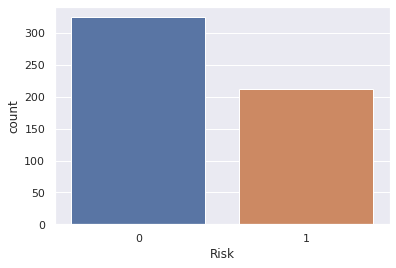

In [ ]:
#visual representation of the target column (dependent variable) all unique values count
sns.set(style="darkgrid")
ax = sns.countplot(x='Risk',  data=minmax_auditdata)
plt.show()

# Preparing Train Dataset to feed in model to train it and Test Dataset to evaluate the model performance to guage its performance on unseen new Test Dataset.

In [ ]:
#initializing the X (independent variables) and y (dependent variable)
X = minmax_auditdata.drop('Risk', axis = 1)
y = minmax_auditdata['Risk']

In [ ]:
#splitting the X (independent variables) and y (dependent variable) into train and test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=5)

# Building the model with hyperparameter and training the model

In [ ]:
#creating object of RandomForestClassifier
rfcparam =  RandomForestClassifier(random_state=5, n_estimators = 500, max_features='auto', max_depth=8, criterion='entropy', class_weight = 'balanced')

In [ ]:
#training the model
rfcparam.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=500,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

# Predicting the Target variable of Test Dataset to evaluate the model performance

In [ ]:
#finding the predicted values for test dataset
rfcparam_pred = rfcparam.predict(X_test)

In [ ]:
#score of the model
rfcparam.score(X_test, y_test)

1.0

In [ ]:
#confusion_matrix of the model's prediction 
tn, fp, fn, tp = confusion_matrix(y_test, rfcparam_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 42
True Negative 66
False Positive 0
False Negative 0


In [ ]:
#precision score of the model's prediction 
precision_score(y_test, rfcparam_pred)

1.0

In [ ]:
#f1 score of the model's prediction 
f1_score(y_test, rfcparam_pred)

1.0

In [ ]:
#roc auc score of the model's prediction 
roc_auc_score(y_test, rfcparam_pred)

1.0

# Predicting the Target variable of new unseen Test Dataset and getting the predicted values in a csv file to download it.


In [ ]:
#finding the predicted values for test dataset
testnew_pred = rfcparam.predict(minmax_audittestdata)

In [ ]:
# To create Dataframe of predicted value with particular respective index
res = pd.DataFrame(testnew_pred) #testnew_pred are nothing but the final predictions of the model on input features of the new unseen test data
res.index = minmax_audittestdata.index # its important for comparison. Here "minmax_audittestdata" is the new unseen test dataset
res.columns = ['Risk']

# To download the csv file locally
from google.colab import files
res.to_csv('submissionfileA.csv')         
files.download('submissionfileA.csv') 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Doing hyperparameter tuning


In [ ]:
#creating object of our RandomForestClassifier model
rfc1 = RandomForestClassifier(random_state=5)

In [ ]:
# #setting the hyperparameter tuning also setting class_weight as the dataset is little imbalance
# parameters = {
#     'n_estimators': [120, 150, 200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
#     'max_depth': [8, 9, 10, 11, 12, 30, 50, 60, 70, 80, 90, 100,],
#     'max_features': ['auto', 'sqrt', 'log2', 0.25, 0.5, 0.75, 1.0],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy'],
#     'min_samples_split': [2, 3, 4, 6, 8, 10],
#     'min_samples_leaf': [1, 2, 4],
#     'class_weight': [{0:1,1:1},{0:1,1:3},{0:1,1:5}, 'balanced'],
# }

In [ ]:
#setting the hyperparameter tuning also setting class_weight as the dataset is little imbalance
parameters = {
    'n_estimators': [800, 1000],
    'max_depth': [10, 30, 50],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy'],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 4],
    'class_weight': [{0:1,1:1}, 'balanced'],
}

In [ ]:
gs = GridSearchCV(estimator=rfc1, param_grid=parameters, scoring = 'roc_auc', cv=10, n_jobs=-1)
gs.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None...
                                              verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
#getting the best parameter of the model for the given dataset
gs.best_params_

{'class_weight': {0: 1, 1: 1},
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 800}

In [ ]:
#creating object of RandomForestClassifier from the best parameter found for the given dataset
rfcbestparam =  RandomForestClassifier(random_state=5, class_weight = {0: 1, 1: 1}, criterion = 'gini', max_depth = 10, max_features = 'auto', 
                                       min_samples_leaf = 1, min_samples_split = 2, n_estimators = 800)

In [ ]:
#training the model
rfcbestparam.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight={0: 1, 1: 1},
                       criterion='gini', max_depth=10, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=800,
                       n_jobs=None, oob_score=False, random_state=5, verbose=0,
                       warm_start=False)

In [ ]:
#finding the predicted values for test dataset
rfcbestparam_pred = rfcbestparam.predict(X_test)

In [ ]:
#score of the model
rfcbestparam.score(X_test, y_test)

1.0

In [ ]:
#confusion_matrix of the model's prediction 
tn, fp, fn, tp = confusion_matrix(y_test, rfcbestparam_pred).ravel()     # ravel() is used to convert a 2D array to 1D array. The output by confusion matrix is a 2D array.
print("True Positive", tp)
print("True Negative", tn)
print("False Positive", fp)
print("False Negative", fn)

True Positive 42
True Negative 66
False Positive 0
False Negative 0


In [ ]:
#precision score of the model's prediction 
precision_score(y_test, rfcbestparam_pred)

1.0

In [ ]:
#f1 score of the model's prediction 
f1_score(y_test, rfcbestparam_pred)

1.0

In [ ]:
#roc auc score of the model's prediction 
roc_auc_score(y_test, rfcbestparam_pred)

1.0

In [ ]:
#finding the predicted values for test dataset
rfcbesttestnew_pred = rfcbestparam.predict(minmax_audittestdata)

In [ ]:
# To create Dataframe of predicted value with particular respective index
rfcbestres = pd.DataFrame(rfcbesttestnew_pred) #testnew_pred are nothing but the final predictions of the model on input features of the new unseen test data
rfcbestres.index = minmax_audittestdata.index # its important for comparison. Here "minmax_audittestdata" is the new unseen test dataset
rfcbestres.columns = ['prediction']

# To download the csv file locally
from google.colab import files
rfcbestres.to_csv('submissionfileB.csv', index = False)         
files.download('submissionfileB.csv')  